In [420]:
import numpy as np 
import pandas as pd

In [421]:
frutas = pd.read_csv("../datasets/frutas.csv")
culmen_columns = ["peso", "textura", "color"]
target_column = "fruta"
frutas.head().T

,0,1,2,3,4
peso,120,160,100,180,80
textura,suave,suave,dura,dura,suave
color,amarillo,amarillo,rojo,rojo,verde
fruta,banana,banana,manzana,manzana,manzana


In [422]:
frutas.nunique()

peso       7
textura    2
color      4
fruta      3
dtype: int64

In [423]:
frutas['fruta'].unique()

array(['banana', 'manzana', 'naranja'], dtype=object)

In [424]:
frutas.isnull().sum()

peso       0
textura    0
color      0
fruta      0
dtype: int64

In [425]:
frutas.dtypes

peso        int64
textura    object
color      object
fruta      object
dtype: object

In [426]:
from sklearn.model_selection import train_test_split
from random import randrange
# randrange(10000)
def dividirDatos(df, num):
    df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=num)

    df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=num)

    y_train = df_train.fruta.values
    y_val = df_val.fruta.values
    y_test=df_test.fruta.values

    del df_test['fruta']
    del df_train['fruta']
    del df_val['fruta']

    return(df_train_full, df_test,df_train, df_val, y_train, y_val, y_test)

In [427]:
df_train_full, df_test,df_train, df_val, y_train, y_val, y_test=dividirDatos(frutas, randrange(10000))


In [428]:
train_dict = df_train.to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'color': 'amarillo', 'peso': 160, 'textura': 'suave'}

In [437]:
train_dict

[{'peso': 160, 'textura': 'suave', 'color': 'amarillo'},
 {'peso': 200, 'textura': 'dura', 'color': 'amarillo'},
 {'peso': 80, 'textura': 'suave', 'color': 'verde'},
 {'peso': 160, 'textura': 'suave', 'color': 'naranja'},
 {'peso': 180, 'textura': 'dura', 'color': 'rojo'}]

In [429]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [430]:
X_train = dv.transform(train_dict)
X_train[0]

array([  1.,   0.,   0.,   0., 160.,   0.,   1.])

In [431]:
dv.get_feature_names_out()

array(['color=amarillo', 'color=naranja', 'color=rojo', 'color=verde',
       'peso', 'textura=dura', 'textura=suave'], dtype=object)

In [432]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [433]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)
y_pred = model.predict_proba(X_val)[:, 1]
fruta = y_pred >= 0.5
fruta

array([False,  True,  True])

In [434]:
test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)
y_pred_test = model.predict_proba(X_test)
y_pred_test = model.predict_proba(X_test)[:, 1]
prediccion = y_pred_test >= 0.5
prediccion

array([ True,  True])

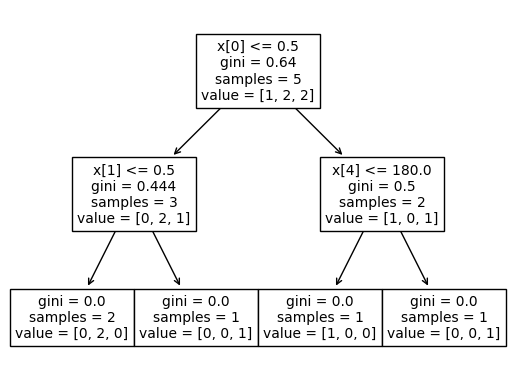

In [435]:

from sklearn import tree
tree.plot_tree(model);
